In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA

In [56]:
df = pd.read_csv("train.csv")

In [57]:
# Useless i think
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Name",axis=1,inplace=True)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,1,1,0,35.0,1,0,113803,53.1000,C123,0.0
4,0,3,1,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,NaN,0.0
887,1,1,0,19.0,0,0,112053,30.0000,B42,0.0
888,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,1,1,1,26.0,0,0,111369,30.0000,C148,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 69.7+ KB


In [11]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [58]:
# Replace with numeric values
df["Sex"].replace(["female","male"],[0,1],inplace=True)
df["Embarked"].replace(["S","C","Q"],[0,1,2],inplace=True)

In [60]:
mask = df["Parch"]>3
print(mask.sum())

10


In [61]:
df.drop("Parch",axis=1,inplace=True)

In [67]:
df.drop("SibSp",axis=1,inplace=True)

In [99]:
df.drop("Cabin",axis=1,inplace=True)

In [100]:
df

,Pclass,Sex,Age,Ticket,Fare,Embarked
0,3,1,22.0,A/5 21171,7.2500,0.0
1,1,0,38.0,PC 17599,71.2833,1.0
2,3,0,26.0,STON/O2. 3101282,7.9250,0.0
3,1,0,35.0,113803,53.1000,0.0
4,3,1,35.0,373450,8.0500,0.0
...,...,...,...,...,...,...
886,2,1,27.0,211536,13.0000,0.0
887,1,0,19.0,112053,30.0000,0.0
888,3,0,NaN,W./C. 6607,23.4500,0.0
889,1,1,26.0,111369,30.0000,1.0


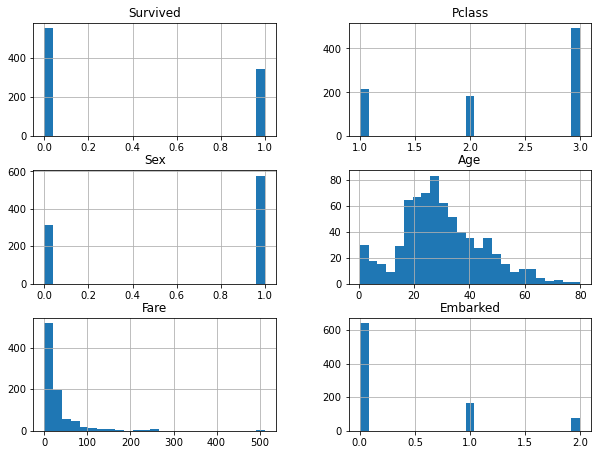

In [69]:
df.hist(figsize=(10,7.5),bins=25)
plt.show()

In [72]:
targets = df["Survived"]
df.drop("Survived",axis=1,inplace=True)

In [98]:
cabin = df["Cabin"].str.split()
cType = []
cNum = []
for i in range(cabin.shape[0]):
    if type(cabin[i]) == list:
        cType.append(cabin[i][0])
        cType.append(cabin[i][0])
        print(len(cabin[i]))
    else:
        cType.append("Z")
        cNum.append(0)

1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
2
3
1
1
2
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
2
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
2
2
1
1
1
1
1
2
1
1
1
1
1
1
1
4
1
1
1
1
2
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1


In [73]:
df

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,A/5 21171,7.2500,NaN,0.0
1,1,0,38.0,PC 17599,71.2833,C85,1.0
2,3,0,26.0,STON/O2. 3101282,7.9250,NaN,0.0
3,1,0,35.0,113803,53.1000,C123,0.0
4,3,1,35.0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...
886,2,1,27.0,211536,13.0000,NaN,0.0
887,1,0,19.0,112053,30.0000,B42,0.0
888,3,0,NaN,W./C. 6607,23.4500,NaN,0.0
889,1,1,26.0,111369,30.0000,C148,1.0


In [97]:
pca1 = PCA(n_components=len(df.columns)).fit(df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').